Generate 5 independent long samples from uniform distribution on the intervals you think they should take values in (A,B,C,D,E). Compute the corresponding Z-scores. What is the average Z-score? Standard deviation? Compare with the result obtained analytically. Play with the number of samples.

In [24]:
import numpy as np

Google for the logistic distribution (with scale $s=1$). What is the density? Can you compute its variance analytically? Find its implementation in numpy. Sample from that distribution; compute average and variance.

Write a function that implements the Merton model. The function scipy.stats.norm.cdf may be of use.

In [29]:
import scipy.stats as si

In [30]:
def Merton(S,T,K,r,sigma):
    return 0

### The first more challenging problem is more-or-less taken from the Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).



In [25]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Handling
#### Let's read our data in using pandas:

In [2]:
dftest = pd.read_csv('test.csv')

In [3]:
df = pd.read_csv('train.csv')

Show an overview of our data: 

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Let's count the missing values for all columns.

In [5]:
count_nan = len(df) - df.count()
print(count_nan)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Take care of missing values:
The features `cabin` has many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset. It is also a good idea do delete the name of the passanger and the number of ticket - this data also cannot probably improve the quality of our predictions. Let's do it with pandas.

    df = df.drop(['Ticket','Cabin', 'Name'], axis=1) 

The next step is to do something with other missing values. Please note that we have 2 missing values in `Embarked` and 177 in `Age` columns. There are several possible solutions, one of them is simply delete all the rows with missing values. You can do it using the following pandas function.
   
    df = df.dropna()


In [6]:
df = df.drop(['Ticket','Cabin', 'Name'], axis=1) 

In [7]:
df = df.dropna()

## Task 1 -  Let's take a look at our data 

### Task 1 a) Data analysis
Let's check:
- how many people survived, and how many don't *(hint - google for pandas value_counts)*
- what is the Passanger Class (`Pclass` column) distribution of our data
- what is the age distribution of our data *(hint - google for pandas histogram)*

In [8]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
10,11,1,3,female,4.0,1,1,16.7000,S


In [9]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

### Task 1b -  Correlation analysis 
Prepare the correlation analysis of the data. In analysis you should display the information about correlations between each pair of variables.

*Hint: You may google for `pandas display correlations` to find the solution

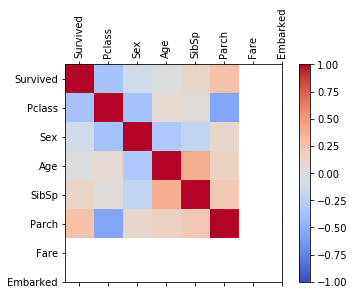

In [10]:
dfbis = df.drop(['PassengerId'], axis=1)
corr = dfbis.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dfbis.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfbis.columns)
ax.set_yticklabels(dfbis.columns)
plt.show()

In [11]:
rs = np.random.RandomState(0)
dfbis = pd.DataFrame(rs.rand(10, 10))
corrl = dfbis.corr()
corrl.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


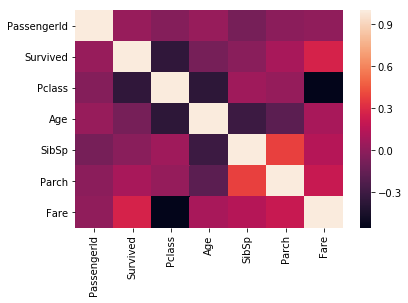

In [12]:
import seaborn as sns
correl = df.corr()
sns.heatmap(correl, xticklabels = correl.columns.values, yticklabels = correl.columns.values)

## Task 2 - Select features and labels
Create the new dataframes/series:
- `X` - with the features
- `y` - with the labels

These dataframes should be ready to use train_test_split, and then to perform machine learning.

**Note: This task will be probably done iteratively - you may get back to this task every time you want to improve your results **

In [13]:
X = df.drop(['Survived', 'PassengerId'], axis=1)

In [14]:
y = df[['Survived']]

## Task 3 One-hot Encoding
Perform one-hot encoding if necessary. 

*Hint: Use `pd.get_dummies`*

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state =1)

In [16]:
X = pd.get_dummies(X, columns = ['Sex', 'Embarked', 'Parch', 'SibSp'])

## Task 3 - Train test split
Split the data into training and testing sets. Use the following parameters:
- Size of testing set = 25% of entire datasize
- Your training / testing sets should contain aproximately the same ratio of survived (use `stratify`)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,stratify = y)

## Task 4 - Train your model
Create and train your model. Maybe use logistic regression and try to re-do it within the probit model.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Task 5 - Test your model
Test your model. Your goal is to prepare the best model possible. 

In [20]:
print(logreg.score(X_train, y_train))


0.8108614232209738


# The above scenario is not quite a recipe for building a model
...but may be of use.

## Let us look at some financial data.

In [31]:
data = pd.read_csv('dataPD.txt')

In [32]:
data.head(20)

,"ID ""deflag"" ""var1_AQ"" ""var2_AQ"" ""var3_CL"" ""var4_CL"" ""var5_LF"" ""var6_LF"" ""var7_PE"" ""var8_PE"" ""var9_LF"" ""var10_PE"" ""var11_AQ"" ""var12_PE"" ""var13_PE"" ""var14_LF"" ""var15_PE"" ""var16_AQ"" ""var17_LF"" ""var18_CL"" ""var19_AQ"" ""var20_AQ"" ""var21_LF"" ""var22_AQ"" ""var23_PE"" ""var24_LF"" ""var25_LF"" ""var26_LF"""
0,1\t0\t0.451876646909016\tNA\t22.3697805400541\...
1,2\t0\t5.51603323346994\t-0.110378449357975\t12...
2,3\t0\t0.781692808734738\t-0.0233898987554511\t...
3,4\t0\t3.24145263326427\t0.372441955517963\tNA\...
4,5\t0\t1.75712684013292\tNA\t14.3417081498234\t...
5,6\t0\t1.45809910922939\t0.105878105804873\tNA\...
6,7\t0\t6.36023844621695\t0.0919247990437209\t22...
7,8\t0\t1.54574551897369\t0.1269977135369\t16.82...
8,9\t0\t7.02931774772663\t0.949204302310173\t10....
9,10\t0\t1.475312962774\t0.122668140588841\tNA\t...


## Data handling
Columns have economical interpretation, grouped into four categories. Is it of any use for us?

Missing values. Can you handle them?

## Histograms 
Let us plot histograms for the corresponding columns. (A loop over df columns and df.hist(column=Col) may be of use.)

## Distribution of the column data, quantiles

## Outliers
Kill'em all.

## Logistic regression for default, ROC, AUC
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html